Fitting a DE algorith to a PSPL model for a Gaia21bsg binary event with no parallax (i.e. parallax = None) to begin with

In [1]:
import pyLIMA

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import csv

from pyLIMA.fits import DE_fit
from pyLIMA.fits import TRF_fit
from pyLIMA.models import PSPL_model
from pyLIMA.models import USBL_model, pyLIMA_fancy_parameters
from pyLIMA.outputs import pyLIMA_plots

from pyLIMA import event
from pyLIMA import telescopes

In [3]:
your_event = event.Event(ra=262.75616,dec=-21.40123)   # setting no parallax for starters
your_event.name = 'Gaia21bsg_binary'

In [4]:
data_1 = np.loadtxt('data/star_20957_Gaia21bsg_fs01_ip_reduced.dat')
telescope_1 = telescopes.Telescope(name='Gaia_20957_i',
                                  camera_filter = 'I',
                                  light_curve = data_1.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

data_2 = np.loadtxt('data/star_50085_Gaia21bsg_gp_reduced.dat')
telescope_2 = telescopes.Telescope(name='Gaia__50085_g',
                                  camera_filter = 'G',
                                  light_curve = data_2.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

data_3 = np.loadtxt('data/star_79874_Gaia21bsg_ip_reduced.dat')
telescope_3 = telescopes.Telescope(name='Gaia_79874_i',
                                  camera_filter = 'I',
                                  light_curve = data_3.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [5]:
data_4 = np.loadtxt('data/reduced_atlas_c.dat',delimiter=' ')   
telescope_4 = telescopes.Telescope(name='ATLAS_c',
                                  camera_filter = 'C',
                                  light_curve = data_4.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [6]:
data_5 = np.loadtxt('data/reduced_atlas_o.dat',delimiter=' ')   
telescope_5 = telescopes.Telescope(name='ATLAS_o',
                                  camera_filter = 'O',
                                  light_curve = data_5.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [8]:
data_6 = np.loadtxt('data/reduced_ztf.dat',delimiter=' ')   
telescope_6 = telescopes.Telescope(name='ZTF_r',
                                  camera_filter = 'R',
                                  light_curve = data_6.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD','mag','mag'])

In [9]:
data_7 = np.loadtxt('data/reduced_gaia.dat',delimiter=' ')   
telescope_7 = telescopes.Telescope(name='Gaia_g',
                                  camera_filter = 'G',
                                  light_curve = data_7.astype(float),
                                  light_curve_names = ['time','mag','err_mag'],
                                  light_curve_units = ['JD', 'mag','mag'])

In [10]:
your_event.telescopes.append(telescope_1)
your_event.telescopes.append(telescope_2)
your_event.telescopes.append(telescope_3)
your_event.telescopes.append(telescope_4)
your_event.telescopes.append(telescope_5)
your_event.telescopes.append(telescope_6)
your_event.telescopes.append(telescope_7)

In [11]:
your_event.find_survey('Gaia')

In [12]:
your_event.check_event()

check_event  : Everything looks fine...


In [13]:
pspl = PSPL_model.PSPLmodel(your_event)

In [14]:
fit_1 = DE_fit.DEfit(pspl)

# a priori parameters from gaia21bsg base model code (t0,u0,tE)

fit_1.model_parameter_guess = [2.45935387e+06, 9.99759380e-01, 1.12577028e+00]

In [15]:
fit_1.fit()

/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/models/ML_model.py:483: RankWarning: Polyfit may be poorly conditioned
  self.derive_telescope_flux(telescope, pyLIMA_parameters, magnification)
/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/models/ML_model.py:483: RankWarning: Polyfit may be poorly conditioned
  self.derive_telescope_flux(telescope, pyLIMA_parameters, magnification)


DE converge to objective function : f(x) =  70639.30790719108
DE converge to parameters : =  ['2459353.8690843815' '0.9995495897287971' '1.1247304736905335']
fit  : Differential Evolution fit SUCCESS
best_model: [2.45935387e+06 9.99549590e-01 1.12473047e+00] -ln(likelihood) 70639.30790719108


<IPython.core.display.Javascript object>


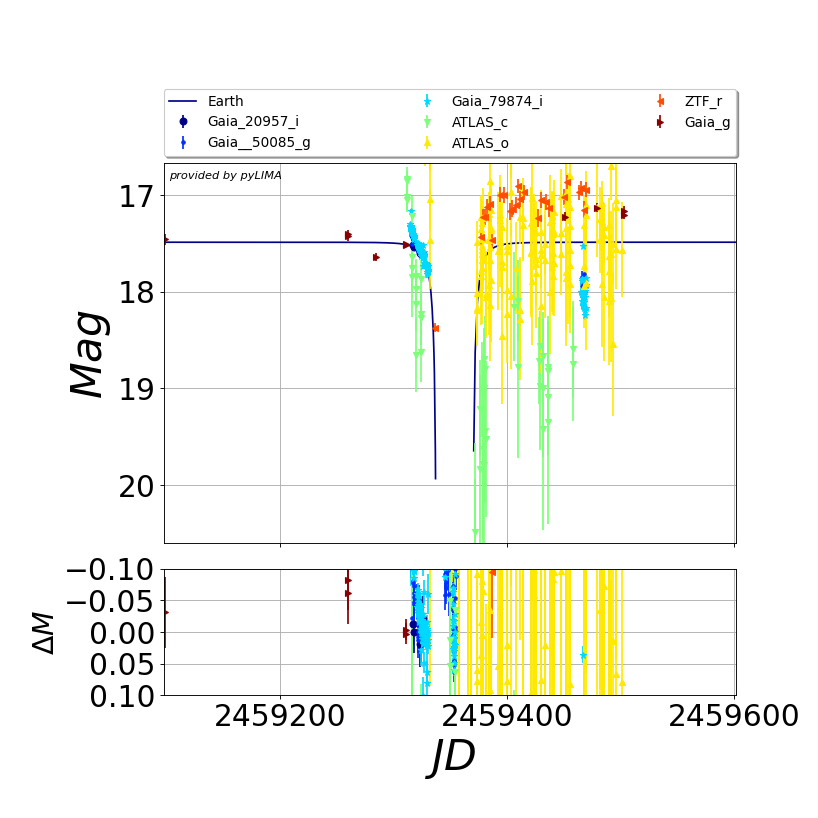

/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1017: RuntimeWarning: invalid value encountered in log10
  np.log10(ref_source * magni + ref_blend)
/home/ezequiel/pyLIMA-env/pyLIMA/pyLIMA/outputs/pyLIMA_plots.py:1112: RuntimeWarning: invalid value encountered in log10
  np.log10(model_flux)


In [16]:
pyLIMA_plots.plot_lightcurves(pspl,fit_1.fit_results['best_model'])
plt.show()

In [17]:
fancy = pyLIMA_fancy_parameters.standard_fancy_parameters
pspl2 = PSPL_model.PSPLmodel(your_event,fancy_parameters=fancy,parallax=['None',2.45935387e+06])

I skip the fancy parameter rho, as it is not part of model PSPL
I skip the fancy parameter separation, as it is not part of model PSPL
I skip the fancy parameter mass_ratio, as it is not part of model PSPL


In [18]:
usbl = USBL_model.USBLmodel(your_event,fancy_parameters=fancy,parallax=['None',2.45935387e+06])

In [19]:
fit_2 = DE_fit.DEfit(usbl, telescopes_fluxes_method='polyfit', DE_population_size=10, max_iteration=10000, display_progress=True)

In [20]:
fit_2.fit_parameters['t0'][1] = [2459282.00, 2459413.00] # t0 limits, changed
fit_2.fit_parameters['u0'][1] = [0.10, 0.15] # u0 limits, computed and changed
fit_2.fit_parameters['log_tE'][1] = [4.09, 4.24] # logtE limits in days, changed

fit_2.fit_parameters['log_rho'][1] = [-6.042577190325831, -2.088329855444677] 
fit_2.fit_parameters['log_separation'][1] = [-4.40904379, -0.13026733] # log_s limits, 
fit_2.fit_parameters['log_mass_ratio'][1] = [-7.472756449463439, 8.15962396e-03] # log_q limits, 
fit_2.fit_parameters['alpha'][1] = [-3.14, 3.14] # alpha limits (in radians), perfect as is

#fit_2.fit_parameters['piEN'][1] = [-0.5, 0.5]   # believe not necessary right now since parallax = 'None'
#fit_2.fit_parameters['piEE'][1] = [-0.5, 0.5]

In [21]:
import multiprocessing as mul
pool = mul.Pool(processes=4)

In [22]:
perform_long_fit = True

In [ ]:
### Fit the model:
if perform_long_fit == True:
    fit_2.fit(computational_pool = pool)
    
    # Save it
    np.save('results_USBL_gaia21bsg.npy', fit_2.fit_results['DE_population'])

else:
    # Use the precomputed Differential Evolution (DE) results:
    fit_2.fit_results['DE_population'] = np.load('./data/results_USBL_DE_966.npy')
    fit_2.fit_results['best_model'] = fit_2.fit_results['DE_population'][346501][0:-1]
    #fit_2.fit_results['best_model'] = [2457205.21, 0.0109583755, 1.78218726, -2.89415218, 0.0475121003, -3.79996021, 2.2549

/home/ezequiel/pyLIMA-env/lib/python3.11/site-packages/scipy/optimize/_differentialevolution.py:387: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


differential_evolution step 1: f(x)= 150751
differential_evolution step 2: f(x)= 150751
differential_evolution step 3: f(x)= 150751
differential_evolution step 4: f(x)= 150751
differential_evolution step 5: f(x)= 150751
differential_evolution step 6: f(x)= 150751
differential_evolution step 7: f(x)= 150751
differential_evolution step 8: f(x)= 150751
differential_evolution step 9: f(x)= 150751
differential_evolution step 10: f(x)= 150751
differential_evolution step 11: f(x)= 150751
differential_evolution step 12: f(x)= 150751
differential_evolution step 13: f(x)= 150751
differential_evolution step 14: f(x)= 150751
differential_evolution step 15: f(x)= 150751
differential_evolution step 16: f(x)= 150751
differential_evolution step 17: f(x)= 149434
differential_evolution step 18: f(x)= 149434
differential_evolution step 19: f(x)= 149434
differential_evolution step 20: f(x)= 149434
differential_evolution step 21: f(x)= 149434
differential_evolution step 22: f(x)= 149434
differential_evolut

differential_evolution step 181: f(x)= 93305.8
differential_evolution step 182: f(x)= 93305.8
differential_evolution step 183: f(x)= 93305.8
differential_evolution step 184: f(x)= 93305.8
differential_evolution step 185: f(x)= 93305.8
differential_evolution step 186: f(x)= 93305.8
differential_evolution step 187: f(x)= 93305.8
differential_evolution step 188: f(x)= 93305.8
differential_evolution step 189: f(x)= 93305.8
differential_evolution step 190: f(x)= 93305.8
differential_evolution step 191: f(x)= 93305.8
differential_evolution step 192: f(x)= 93305.8
differential_evolution step 193: f(x)= 93305.8
differential_evolution step 194: f(x)= 93305.8
differential_evolution step 195: f(x)= 93305.8
differential_evolution step 196: f(x)= 93305.8
differential_evolution step 197: f(x)= 93305.8
differential_evolution step 198: f(x)= 93305.8
differential_evolution step 199: f(x)= 93305.8
differential_evolution step 200: f(x)= 93305.8
differential_evolution step 201: f(x)= 93305.8
differential_